In [1]:
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

def plot_tensorboard_scalars(writer_path, tags=['loss', 'val_loss']):
    # Load the event files
    ea = event_accumulator.EventAccumulator(writer_path)
    ea.Reload()

    available_tags = ea.Tags()['scalars']
    print("Available scalar tags:", available_tags)

    plt.figure(figsize=(10, 6))

    for tag in tags:
        if tag not in available_tags:
            print(f"⚠️  Tag '{tag}' not found. Skipping.")
            continue

        events = ea.Scalars(tag)
        steps = [e.step for e in events]
        values = [e.value for e in events]

        plt.plot(steps, values, label=tag)

    plt.xlabel('Step')
    plt.ylabel('Value')
    plt.title(f'TensorBoard Scalars: {", ".join(tags)}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Available scalar tags: ['running train/loss', 'running train/1st step mae', 'running train/mae', 'running train/steer loss', 'running train/accel loss', 'epoch training/loss', 'epoch training/1st step mae', 'epoch training/mae', 'epoch training/steer loss', 'epoch training/accel loss', 'running val/loss', 'running val/1st step mae', 'running val/mae', 'running val/steer loss', 'running val/accel loss', 'epoch validation/loss', 'epoch validation/1st step mae', 'epoch validation/mae', 'epoch validation/steer loss', 'epoch validation/accel loss']


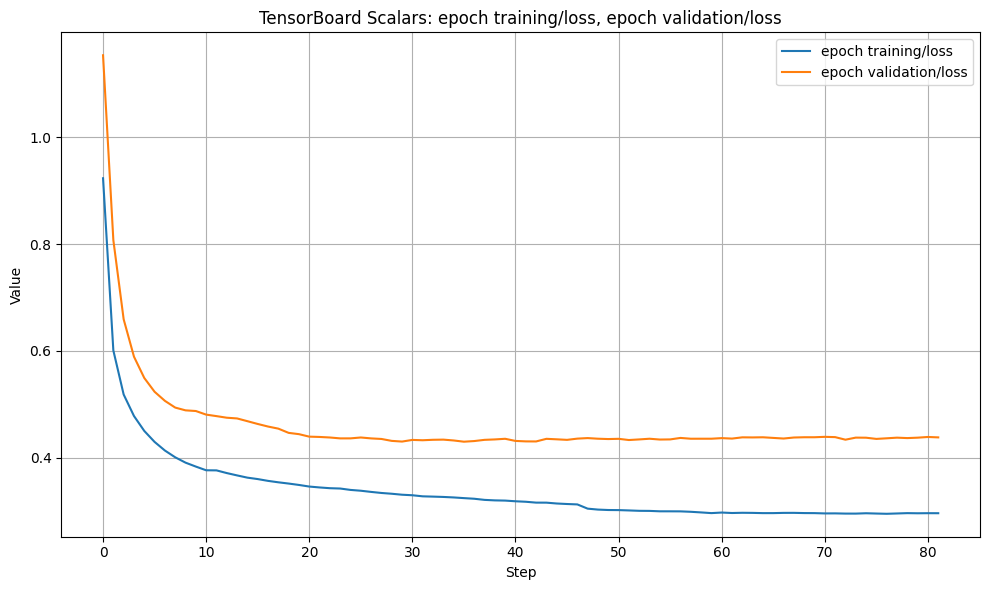

In [3]:

writer_path = "runs/CILv3D_sim2real_artifacts_val"
plot_tensorboard_scalars(writer_path, tags=['epoch training/loss', 'epoch validation/loss'])


In [15]:
from tensorboard.backend.event_processing import event_accumulator

def print_min_scalar_values(writer_path, tags=['loss', 'val_loss']):
    # Load the event files
    ea = event_accumulator.EventAccumulator(writer_path)
    ea.Reload()

    available_tags = ea.Tags()['scalars']
    print("Available scalar tags:", available_tags)
    print("\n🔍 Minimum scalar values:")

    for tag in tags:
        if tag not in available_tags:
            print(f"⚠️  Tag '{tag}' not found. Skipping.")
            continue

        events = ea.Scalars(tag)
        min_event = min(events, key=lambda e: e.value)
        print(f"• {tag}: min = {min_event.value:.4f} at step {min_event.step}")


In [30]:
run_paths = [
    "runs/CILv3D_lookahead_carla_5-2025-07-10_15_38_07_193740-lr_5e-05-bs_64",
    "runs/CILv3D_lookahead_sim_5-2025-08-12_14_19_42_091293-lr_5e-05-bs_64",
    "runs/CILv3D_sim2real_artifacts_val"
]

custom_labels = ["synthetic", "sim2real", "sim2real artifacts trick"]

for writer_path, label in zip(run_paths, custom_labels):
    print()
    print(label)
    print_min_scalar_values(writer_path, tags=['epoch training/loss', 'epoch validation/loss'])


synthetic
Available scalar tags: ['running train/loss', 'running train/1st step mae', 'running train/mae', 'running train/steer loss', 'running train/accel loss', 'epoch training/loss', 'epoch training/1st step mae', 'epoch training/mae', 'epoch training/steer loss', 'epoch training/accel loss', 'running val/loss', 'running val/1st step mae', 'running val/mae', 'running val/steer loss', 'running val/accel loss', 'epoch validation/loss', 'epoch validation/1st step mae', 'epoch validation/mae', 'epoch validation/steer loss', 'epoch validation/accel loss']

🔍 Minimum scalar values:
• epoch training/loss: min = 0.2567 at step 82
• epoch validation/loss: min = 0.4208 at step 55

sim2real
Available scalar tags: ['running train/loss', 'running train/1st step mae', 'running train/mae', 'running train/steer loss', 'running train/accel loss', 'epoch training/loss', 'epoch training/1st step mae', 'epoch training/mae', 'epoch training/steer loss', 'epoch training/accel loss', 'running val/loss', 

In [ ]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
import math

def plot_tensorboard_scalar_grid(writer_path, grids):
    # Load the event files
    ea = event_accumulator.EventAccumulator(writer_path)
    ea.Reload()

    available_tags = ea.Tags()['scalars']
    print("Available scalar tags:", available_tags)

    n_plots = len(grids)
    n_cols = 2
    n_rows = math.ceil(n_plots / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 3.5 * n_rows), squeeze=False)

    for idx, tag_group in enumerate(grids):
        row = idx // n_cols
        col = idx % n_cols
        ax = axs[row][col]

        found_any = False
        for tag in tag_group:
            if tag not in available_tags:
                print(f"[!] Tag '{tag}' not found. Skipping.")
                continue

            events = ea.Scalars(tag)
            steps = [e.step for e in events]
            values = [e.value for e in events]
            ax.plot(steps, values, label=tag)
            found_any = True

        if found_any:
            ax.set_title(" | ".join(tag_group))
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Value')
            ax.legend()
            ax.grid(True)
        else:
            ax.set_title("No valid tags in this group.")
            ax.axis('off')

    # Turn off unused axes
    total_axes = n_rows * n_cols
    for i in range(n_plots, total_axes):
        row = i // n_cols
        col = i % n_cols
        axs[row][col].axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
writer_path = "runs/CILv3D_sim2real_artifacts_val"
grids = [
    ['epoch training loss', 'epoch validation loss'],
    ['epoch segmentation loss', 'epoch segmentation acc'],
    ['epoch intersection loss'],
    ['epoch road edge loss', 'epoch traffic light loss']
]

plot_tensorboard_scalar_grid(writer_path, grids)


In [27]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from tensorboard.backend.event_processing import event_accumulator
import math
import os

def get_color_shades(base_color, n_shades):
    """Generate n discrete shades of a base color."""
    try:
        c = mcolors.cnames[base_color]
    except:
        c = base_color
    c = mcolors.to_rgb(c)
    shades = []
    for i in range(n_shades):
        factor = 0.7 + 0.3 * (i / max(1, n_shades - 1))  # 0.7 -> 1.0
        shade = tuple(min(1, max(0, x * factor)) for x in c)
        shades.append(shade)
    return shades

def plot_tensorboard_scalar_grid_multi(run_paths, grids, run_labels=None, run_colors=None, save_path=None):
    """
    Plot TensorBoard scalars in a grid across multiple runs,
    with custom colors and discrete shades, and optionally save to file.

    Args:
        run_paths (list[str]): List of paths to TensorBoard runs.
        grids (list[list[str]]): Each sublist contains tags to plot in the same subplot.
        run_labels (list[str], optional): Custom labels for each run.
        run_colors (list[str], optional): Base colors for each run.
        save_path (str, optional): File path to save the plot (PNG, PDF, etc.).
    """
    # Load all runs
    runs = []
    for path in run_paths:
        ea = event_accumulator.EventAccumulator(path)
        ea.Reload()
        runs.append(ea)

    # Default labels = folder names
    if run_labels is None:
        run_labels = [os.path.basename(os.path.normpath(p)) for p in run_paths]
    if len(run_labels) != len(run_paths):
        raise ValueError("run_labels must have the same length as run_paths")

    # Default colors = matplotlib tab10
    if run_colors is None:
        cmap = plt.get_cmap("tab10")
        run_colors = [cmap(i) for i in range(len(run_paths))]
    if len(run_colors) != len(run_paths):
        raise ValueError("run_colors must have the same length as run_paths")

    n_plots = len(grids)
    n_cols = 2
    n_rows = math.ceil(n_plots / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 3.5 * n_rows), squeeze=False)

    for idx, tag_group in enumerate(grids):
        row = idx // n_cols
        col = idx % n_cols
        ax = axs[row][col]

        found_any = False
        n_tags = len(tag_group)

        for run_idx, (ea, run_label, base_color) in enumerate(zip(runs, run_labels, run_colors)):
            shades = get_color_shades(base_color, n_tags)

            for tag_idx, tag in enumerate(tag_group):
                available_tags = ea.Tags()['scalars']
                if tag not in available_tags:
                    print(f"[!] Tag '{tag}' not found in run '{run_label}'. Skipping.")
                    continue

                events = ea.Scalars(tag)
                steps = [e.step for e in events]
                values = [e.value for e in events]

                # ax.plot(steps, values, label=f"{run_label} - {tag}", color=shades[tag_idx])
                ax.plot(steps, values, label=f"{run_label}", color=shades[tag_idx])
                found_any = True

        if found_any:
            ax.set_title(" | ".join(tag_group))
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Value')
            ax.legend(fontsize=8)
            ax.grid(True)
        else:
            ax.set_title("No valid tags in this group.")
            ax.axis('off')

    # Turn off unused axes
    total_axes = n_rows * n_cols
    for i in range(n_plots, total_axes):
        row = i // n_cols
        col = i % n_cols
        axs[row][col].axis('off')

    plt.tight_layout()

    # Save the figure if a path is provided
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')
        print(f"[✓] Plot saved to: {save_path}")

    plt.show()


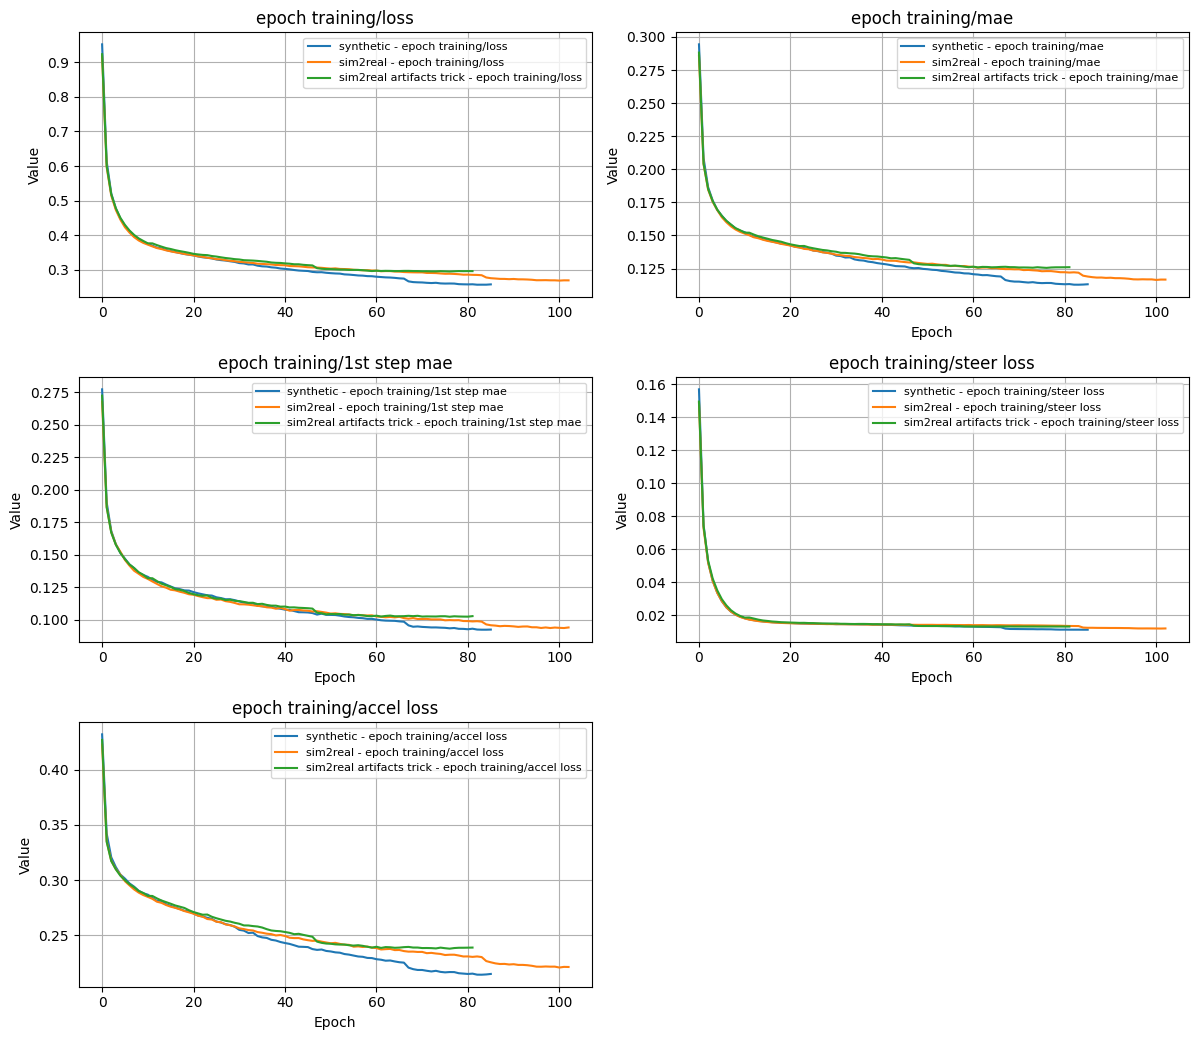

In [11]:
run_paths = [
    "runs/CILv3D_lookahead_carla_5-2025-07-10_15_38_07_193740-lr_5e-05-bs_64",
    "runs/CILv3D_lookahead_sim_5-2025-08-12_14_19_42_091293-lr_5e-05-bs_64",
    "runs/CILv3D_sim2real_artifacts_val"
]

custom_labels = ["synthetic", "sim2real", "sim2real artifacts trick"]

grids = [
    ['epoch training/loss'],
    ['epoch training/mae'],
    ['epoch training/1st step mae'],
    ['epoch training/steer loss'],
    ['epoch training/accel loss'],
]

plot_tensorboard_scalar_grid_multi(run_paths, grids, run_labels=custom_labels)


[✓] Plot saved to: metrics.png


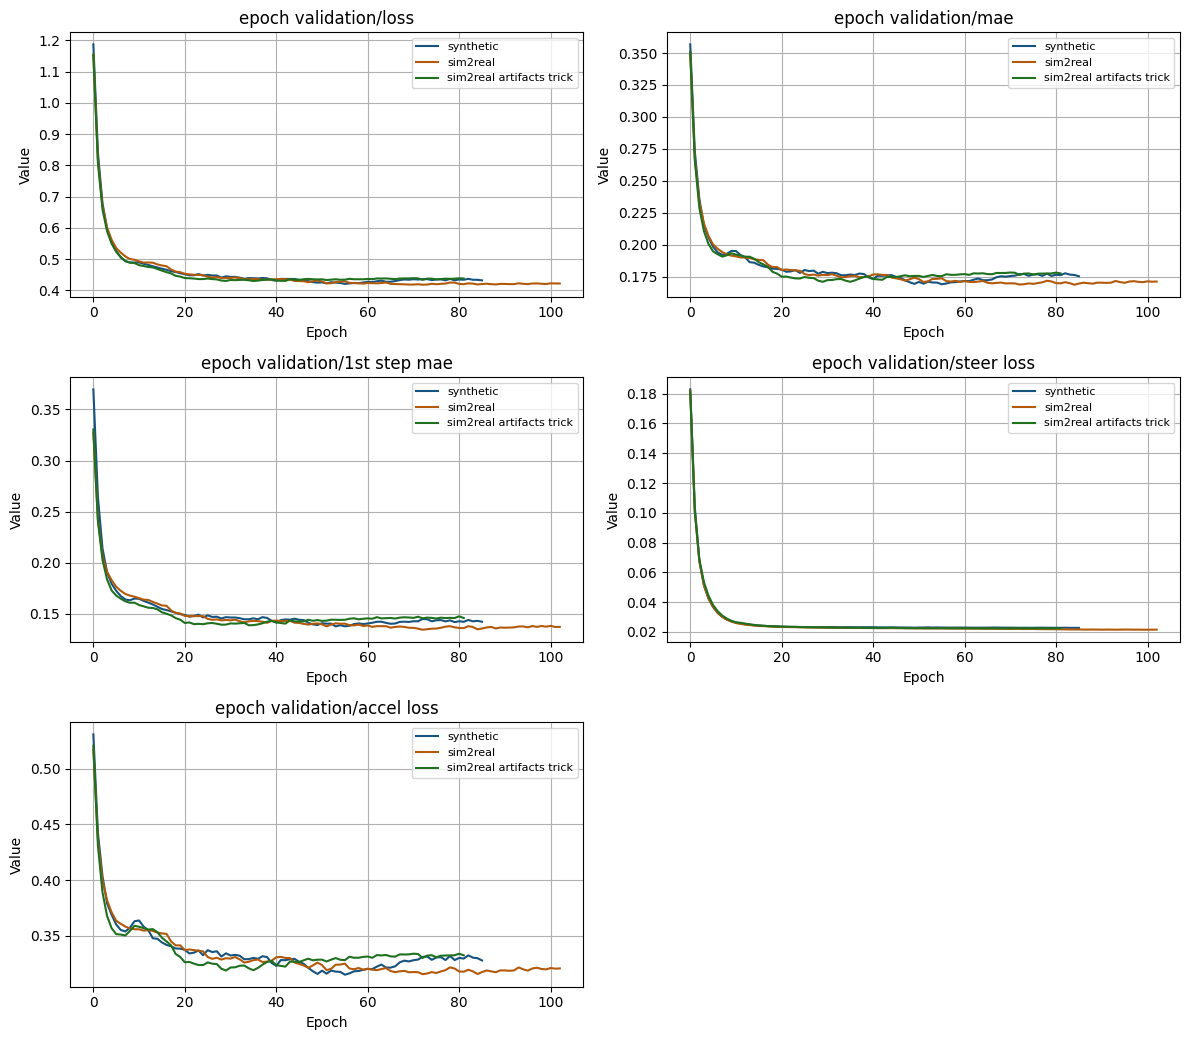

In [28]:
run_paths = [
    "runs/CILv3D_lookahead_carla_5-2025-07-10_15_38_07_193740-lr_5e-05-bs_64",
    "runs/CILv3D_lookahead_sim_5-2025-08-12_14_19_42_091293-lr_5e-05-bs_64",
    "runs/CILv3D_sim2real_artifacts_val"
]

custom_labels = ["synthetic", "sim2real", "sim2real artifacts trick"]

grids = [
    ['epoch validation/loss'],
    ['epoch validation/mae'],
    ['epoch validation/1st step mae'],
    ['epoch validation/steer loss'],
    ['epoch validation/accel loss'],
]

plot_tensorboard_scalar_grid_multi(run_paths, grids, run_labels=custom_labels, save_path="metrics.png")


[✓] Plot saved to: metrics.png


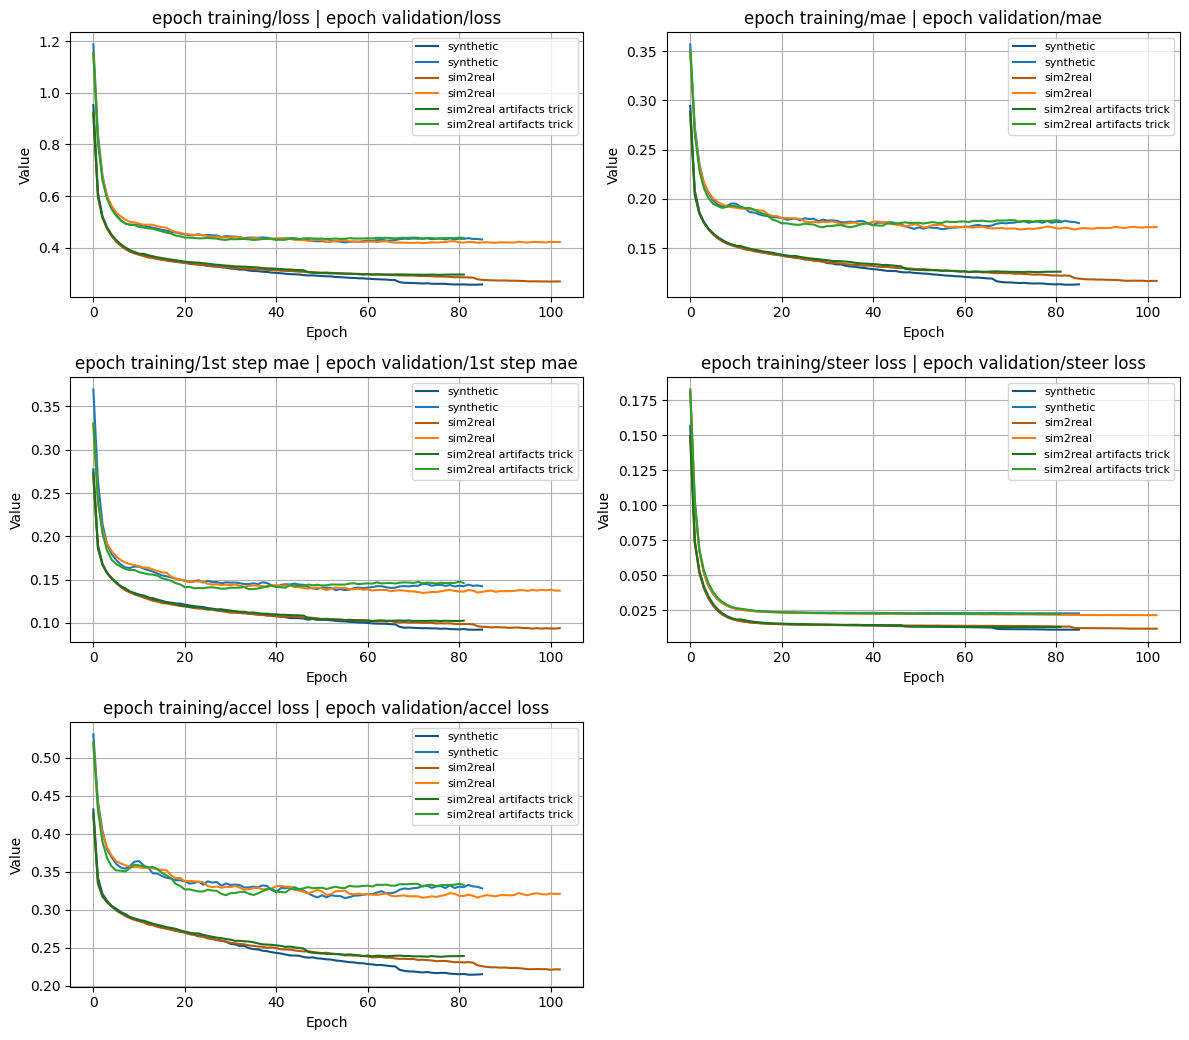

In [29]:
run_paths = [
    "runs/CILv3D_lookahead_carla_5-2025-07-10_15_38_07_193740-lr_5e-05-bs_64",
    "runs/CILv3D_lookahead_sim_5-2025-08-12_14_19_42_091293-lr_5e-05-bs_64",
    "runs/CILv3D_sim2real_artifacts_val"
]
custom_labels = ["synthetic", "sim2real", "sim2real artifacts trick"]
custom_colors = ["tab:blue", "tab:orange", "tab:green"]
grids = [
    ['epoch training/loss', 'epoch validation/loss'],
    ['epoch training/mae', 'epoch validation/mae'],
    ['epoch training/1st step mae', 'epoch validation/1st step mae'],
    ['epoch training/steer loss', 'epoch validation/steer loss'],
    ['epoch training/accel loss', 'epoch validation/accel loss'],
]

plot_tensorboard_scalar_grid_multi(run_paths, grids, run_labels=custom_labels, run_colors=custom_colors, save_path="metrics.png")